# CSE 482 Project (due April 26, 2020)

Using Major League Baseball data to predict games - by Ty Buckley and Alec Gillis

**1.** Data has been downloaded from the 2010-2019 Game Logs Data from https://www.retrosheet.org/gamelogs/index.html . All files were extracted from the downloaded zip file into a new folder called "Games". Then, the type of file for each of the 10 TXT files was changed into CSV files. We will first look at the 2010 season file.

In [1]:
import pandas as pd

data = pd.read_csv("Games/GL2010.csv",header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,151,152,153,154,155,156,157,158,159,160
0,20100404,0,Sun,NYA,AL,1,BOS,AL,1,7,...,J.D. Drew,9,camem001,Mike Cameron,8,scutm001,Marco Scutaro,6,NaN,Y
1,20100405,0,Mon,MIN,AL,1,ANA,AL,1,3,...,Howie Kendrick,4,woodb003,Brandon Wood,5,mathj001,Jeff Mathis,2,NaN,Y
2,20100405,0,Mon,CLE,AL,1,CHA,AL,1,0,...,A.J. Pierzynski,2,teahm001,Mark Teahen,5,ramia003,Alexei Ramirez,6,NaN,Y
3,20100405,0,Mon,DET,AL,1,KCA,AL,1,8,...,Yuniesky Betancourt,6,kendj001,Jason Kendall,2,getzc001,Chris Getz,4,NaN,Y
4,20100405,0,Mon,SEA,AL,1,OAK,AL,1,5,...,Mark Ellis,4,buckt001,Travis Buck,7,pennc001,Cliff Pennington,6,NaN,Y


**2.** We want to narrow down the amount of columns to the ones we will need.

In [2]:
Vteam = data[3]
VgameNum = data[5]
Hteam = data[6]
HgameNum = data[8]
Vscore = data[9]
Hscore = data[10]
Hresult = []
Vresult = []
for v,h in zip(Vscore,Hscore):
    if h>v:
        Hresult.append('W')
        Vresult.append('L')
    else:
        Hresult.append('L')
        Vresult.append('W')
Vab = data[21]
Vhits = data[22]
Vdoubles = data[23]
Vtriples = data[24]
Vhr = data[25]
Vrbi = data[26]
Vwalk = data[30]
Vstrikeout = data[32]
Vstl = data[33]
Vcstl = data[34]
Vlob = data[37]
Vpitchers = data[38]
Ver = data[39]
Vwild = data[41]
Vassist = data[44]
Verr = data[45]
Vdp = data[47]
        
Hab = data[49]
Hhits = data[50]
Hdoubles = data[51]
Htriples = data[52]
Hhr = data[53]
Hrbi = data[54]
Hwalk = data[58]
Hstrikeout = data[60]
Hstl = data[61]
Hcstl = data[62]
Hlob = data[65]
Hpitchers = data[66]
Her = data[67]
Hwild = data[69]
Hassist = data[72]
Herr = data[73]
Hdp = data[75]

Houts = []
Vouts = []
for outs in data[11]:
    inns = outs // 6
    extraOuts = outs - inns*6
    if extraOuts > 3:
        Houts.append(inns*3 + 3)
        Vouts.append(inns*3 + extraOuts - 3)
    elif extraOuts > 0:
        Houts.append(inns*3 + extraOuts)
        Vouts.append(inns*3)
    else:
        Houts.append(inns*3)
        Vouts.append(inns*3)

df = pd.DataFrame()
df['VisitingTeam'] = Vteam
df['VisitingGameNum'] = VgameNum
df['VisitingScore'] = Vscore
df['VisitingResult'] = Vresult
df['VisitingOuts'] = Vouts

df['VisitingAB'] = Vab
df['VisitingHits'] = Vhits
# df['VisitingDoubles'] = Vdoubles
# df['VisitingTriples'] = Vtriples
df['VisitingHR'] = Vhr
# df['VisitingRBI'] = Vrbi
df['VisitingWalks'] = Vwalk
df['VisitingStrikeouts'] = Vstrikeout
df['VisitingSteals'] = Vstl
# df['VisitingCaughtSteals'] = Vcstl
# df['VisitingLOB'] = Vlob
# df['VisitingNumPitchers'] = Vpitchers
df['VisitingER'] = Ver
# df['VisitingWildPitches'] = Vwild
# df['VisitingAssists'] = Vassist
df['VisitingErrors'] = Verr
# df['VisitingDoublePlays'] = Vdp

df['HomeTeam'] = Hteam
df['HomeGameNum'] = HgameNum
df['HomeScore'] = Hscore
df['HomeResult'] = Hresult
df['HomeOuts'] = Houts

df['HomeAB'] = Hab
df['HomeHits'] = Hhits
# df['HomeDoubles'] = Hdoubles
# df['HomeTriples'] = Htriples
df['HomeHR'] = Hhr
# df['HomeRBI'] = Hrbi
df['HomeWalks'] = Hwalk
df['HomeStrikeouts'] = Hstrikeout
df['HomeSteals'] = Hstl
# df['HomeCaughtSteals'] = Hcstl
# df['HomeLOB'] = Hlob
# df['HomeNumPitchers'] = Hpitchers
df['HomeER'] = Her
# df['HomeWildPitches'] = Hwild
# df['HomeAssists'] = Hassist
df['HomeErrors'] = Herr
# df['HomeDoublePlays'] = Hdp

df.head()

,VisitingTeam,VisitingGameNum,VisitingScore,VisitingResult,VisitingOuts,VisitingAB,VisitingHits,VisitingHR,VisitingWalks,VisitingStrikeouts,...,HomeResult,HomeOuts,HomeAB,HomeHits,HomeHR,HomeWalks,HomeStrikeouts,HomeSteals,HomeER,HomeErrors
0,NYA,1,7,L,24,37,12,2,6,2,...,W,27,34,12,1,4,5,0,7,0
1,MIN,1,3,L,24,32,7,1,3,8,...,W,27,33,9,3,3,5,1,3,0
2,CLE,1,0,L,24,30,4,0,1,7,...,W,27,28,6,2,5,4,0,0,0
3,DET,1,8,W,27,39,12,0,2,9,...,L,27,35,9,1,2,8,2,7,1
4,SEA,1,5,W,27,31,6,1,8,8,...,L,27,28,5,0,7,6,1,2,4


**3.** We will work on calculating team statistics for each team. We will dynamically update a dataframe using all the teams in the next step, but this is an example of that table after the first 100 games are played.

In [3]:
# ex = df[df.VisitingGameNum != 1]
# ex[ex.HomeGameNum !=1]
example = pd.DataFrame(columns=['Team','Wins','NumGames','RunsScored','RunsAgainst','OffenseOuts','DefenseOuts','AtBats','Hits','OffenseHRs','DefenseHRs','OffenseWalks','DefenseWalks','OffenseStrikeouts','DefenseStrikeouts','Steals','EarnedRuns','Errors'])
for row_index, row in df.iterrows():
    if row_index >= 100:
        break
        
    if row['VisitingResult'] == 'W':
        vWin = 1
        hWin = 0
    else:
        vWin = 0
        hWin = 1
    
    if row['VisitingTeam'] in example.values:
        example.loc[row['VisitingTeam']].Wins += vWin
        example.loc[row['VisitingTeam']].NumGames = row['VisitingGameNum']
        example.loc[row['VisitingTeam']].RunsScored += row['VisitingScore']
        example.loc[row['VisitingTeam']].RunsAgainst += row['HomeScore']
        example.loc[row['VisitingTeam']].OffenseOuts += row['HomeOuts']
        example.loc[row['VisitingTeam']].DefenseOuts += row['VisitingOuts']
        example.loc[row['VisitingTeam']].AtBats += row['VisitingAB']
        example.loc[row['VisitingTeam']].Hits +=row['VisitingHits']
        example.loc[row['VisitingTeam']].OffenseHRs += row['VisitingHR']
        example.loc[row['VisitingTeam']].DefenseHRs += row['HomeHR']
        example.loc[row['VisitingTeam']].OffenseWalks += row['VisitingWalks']
        example.loc[row['VisitingTeam']].DefenseWalks += row['HomeWalks']
        example.loc[row['VisitingTeam']].OffenseStrikeouts += row['VisitingStrikeouts']
        example.loc[row['VisitingTeam']].DefenseStrikeouts += row['HomeStrikeouts']
        example.loc[row['VisitingTeam']].Steals += row['VisitingSteals']
        example.loc[row['VisitingTeam']].EarnedRuns += row['VisitingER']
        example.loc[row['VisitingTeam']].Errors += row['VisitingErrors']
    else:
        
        example = example.append({'Team':row['VisitingTeam'],'Wins':vWin,'NumGames':1,'RunsScored':row['VisitingScore'], 'RunsAgainst':row['HomeScore'], 'OffenseOuts':row['HomeOuts'],'DefenseOuts':row['VisitingOuts'],'AtBats':row['VisitingAB'],'Hits':row['VisitingHits'],'OffenseHRs':row['VisitingHR'],'DefenseHRs':row['HomeHR'],'OffenseWalks':row['VisitingWalks'],'DefenseWalks':row['HomeWalks'],'OffenseStrikeouts':row['VisitingStrikeouts'],'DefenseStrikeouts':row['HomeStrikeouts'],'Steals':row['VisitingSteals'],'EarnedRuns':row['VisitingER'],'Errors':row['VisitingErrors']}, ignore_index=True)
        example = example.set_index('Team',drop=False)
        
    if row['HomeTeam'] in example.values:
        example.loc[row['HomeTeam']].Wins += hWin
        example.loc[row['HomeTeam']].NumGames = row['HomeGameNum']
        example.loc[row['HomeTeam']].RunsScored += row['HomeScore']
        example.loc[row['HomeTeam']].RunsAgainst += row['VisitingScore']
        example.loc[row['HomeTeam']].OffenseOuts += row['VisitingOuts']
        example.loc[row['HomeTeam']].DefenseOuts += row['HomeOuts']
        example.loc[row['HomeTeam']].AtBats += row['HomeAB']
        example.loc[row['HomeTeam']].Hits +=row['HomeHits']
        example.loc[row['HomeTeam']].OffenseHRs += row['HomeHR']
        example.loc[row['HomeTeam']].DefenseHRs += row['VisitingHR']
        example.loc[row['HomeTeam']].OffenseWalks += row['HomeWalks']
        example.loc[row['HomeTeam']].DefenseWalks += row['VisitingWalks']
        example.loc[row['HomeTeam']].OffenseStrikeouts += row['HomeStrikeouts']
        example.loc[row['HomeTeam']].DefenseStrikeouts += row['VisitingStrikeouts']
        example.loc[row['HomeTeam']].Steals += row['HomeSteals']
        example.loc[row['HomeTeam']].EarnedRuns += row['HomeER']
        example.loc[row['HomeTeam']].Errors += row['HomeErrors']
    else:
        
        example = example.append({'Team':row['HomeTeam'],'Wins':hWin,'NumGames':1,'RunsScored':row['HomeScore'], 'RunsAgainst':row['VisitingScore'], 'OffenseOuts':row['VisitingOuts'],'DefenseOuts':row['HomeOuts'],'AtBats':row['HomeAB'],'Hits':row['HomeHits'],'OffenseHRs':row['HomeHR'],'DefenseHRs':row['VisitingHR'],'OffenseWalks':row['HomeWalks'],'DefenseWalks':row['VisitingWalks'],'OffenseStrikeouts':row['HomeStrikeouts'],'DefenseStrikeouts':row['VisitingStrikeouts'],'Steals':row['HomeSteals'],'EarnedRuns':row['HomeER'],'Errors':row['HomeErrors']}, ignore_index=True)
        example = example.set_index('Team',drop=False)

example.head()

,Team,Wins,NumGames,RunsScored,RunsAgainst,OffenseOuts,DefenseOuts,AtBats,Hits,OffenseHRs,DefenseHRs,OffenseWalks,DefenseWalks,OffenseStrikeouts,DefenseStrikeouts,Steals,EarnedRuns,Errors
Team,,,,,,,,,,,,,,,,,,
NYA,NYA,4,6,36,26,165,159,213,58,7,4,31,18,34,34,8,24,4
BOS,BOS,3,7,35,34,189,186,242,68,9,9,19,26,45,36,5,32,2
MIN,MIN,6,8,37,23,219,216,274,71,11,7,34,18,52,40,7,23,1
ANA,ANA,2,7,24,44,184,189,238,62,8,12,17,26,45,45,1,39,6
CLE,CLE,2,7,24,34,198,188,235,52,5,6,24,45,56,37,6,31,1


**4.** We will use this updating dataframe to make a new one for each game where both teams have already played at least one game. We will use the current values from the above dataframe to calculate the statistics for each team for the season, up to that game. The statistics we will use are: 

WinPercentage, RunsPerInning, RunsAgainstPerInning, BattingAverage, OffHRsPerInning, DefHRsPerInning, OffWalksPerInning, DefWalksPerInning, OffStrikeoutsPerInning, DefStrikeoutsPerInning, StealsPerInning, ERA, ErrorsPerInning

All for both home and away teams (which will prefix each variable with either 'Home' or 'Away')

Note: we will only use data once both teams have played half of their games in the season! This is because season statistics are biased if a team has only played a few games.

In [4]:
games = pd.DataFrame(columns=['HomeWin','HomeWinPercentage', 'HomeRunsPerInning', 'HomeRunsAgainstPerInning','HomeBattingAverage', 'HomeOffHRsPerInning', 'HomeDefHRsPerInning', 'HomeOffWalksPerInning', 'HomeDefWalksPerInning', 'HomeOffStrikeoutsPerInning', 'HomeDefStrikeoutsPerInning', 'HomeStealsPerInning', 'HomeERA', 'HomeErrorsPerInning','AwayWinPercentage', 'AwayRunsPerInning', 'AwayRunsAgainstPerInning','AwayBattingAverage', 'AwayOffHRsPerInning', 'AwayDefHRsPerInning', 'AwayOffWalksPerInning', 'AwayDefWalksPerInning', 'AwayOffStrikeoutsPerInning', 'AwayDefStrikeoutsPerInning', 'AwayStealsPerInning', 'AwayERA', 'AwayErrorsPerInning'])
teams = pd.DataFrame(columns=['Team','Wins','NumGames','RunsScored','RunsAgainst','OffenseOuts','DefenseOuts','AtBats','Hits','OffenseHRs','DefenseHRs','OffenseWalks','DefenseWalks','OffenseStrikeouts','DefenseStrikeouts','Steals','EarnedRuns','Errors'])
for row_index, row in df.iterrows():
#     if row_index >= 100:
#          break

    #calculate the winner
    if row['VisitingResult'] == 'W':
        vWin = 1
        hWin = 0
    else:
        vWin = 0
        hWin = 1
    
    #first add to the new games dataframe only if both teams have played half of their games
    if row['VisitingTeam'] in teams.values and row['HomeTeam'] in teams.values and teams.loc[row['HomeTeam']].NumGames > 81 and teams.loc[row['VisitingTeam']].NumGames > 81:
        homeTeam = teams.loc[row['HomeTeam']]
        awayTeam = teams.loc[row['VisitingTeam']]
        gamedict = {
            'HomeWin': bool(hWin),
            'HomeWinPercentage': homeTeam.Wins / homeTeam.NumGames,
            'HomeRunsPerInning': homeTeam.RunsScored / homeTeam.OffenseOuts * 3,
            'HomeRunsAgainstPerInning': homeTeam.RunsAgainst / homeTeam.DefenseOuts * 3,
            'HomeBattingAverage': homeTeam.Hits / homeTeam.AtBats, 
            'HomeOffHRsPerInning': homeTeam.OffenseHRs / homeTeam.OffenseOuts * 3, 
            'HomeDefHRsPerInning': homeTeam.DefenseHRs / homeTeam.DefenseOuts * 3, 
            'HomeOffWalksPerInning': homeTeam.OffenseWalks / homeTeam.OffenseOuts * 3,
            'HomeDefWalksPerInning': homeTeam.DefenseWalks / homeTeam.DefenseOuts * 3, 
            'HomeOffStrikeoutsPerInning': homeTeam.OffenseStrikeouts / homeTeam.OffenseOuts * 3, 
            'HomeDefStrikeoutsPerInning': homeTeam.DefenseStrikeouts / homeTeam.DefenseOuts * 3,  
            'HomeStealsPerInning': homeTeam.Steals / homeTeam.OffenseOuts * 3, 
            'HomeERA': homeTeam.EarnedRuns / homeTeam.DefenseOuts * 3 * 9,
            'HomeErrorsPerInning': homeTeam.Errors / homeTeam.DefenseOuts * 3,
            'AwayWinPercentage': awayTeam.Wins / awayTeam.NumGames,
            'AwayRunsPerInning': awayTeam.RunsScored / awayTeam.OffenseOuts * 3,
            'AwayRunsAgainstPerInning': awayTeam.RunsAgainst / awayTeam.DefenseOuts * 3,
            'AwayBattingAverage': awayTeam.Hits / awayTeam.AtBats, 
            'AwayOffHRsPerInning': awayTeam.OffenseHRs / awayTeam.OffenseOuts * 3, 
            'AwayDefHRsPerInning': awayTeam.DefenseHRs / awayTeam.DefenseOuts * 3, 
            'AwayOffWalksPerInning': awayTeam.OffenseWalks / awayTeam.OffenseOuts * 3,
            'AwayDefWalksPerInning': awayTeam.DefenseWalks / awayTeam.DefenseOuts * 3, 
            'AwayOffStrikeoutsPerInning': awayTeam.OffenseStrikeouts / awayTeam.OffenseOuts * 3, 
            'AwayDefStrikeoutsPerInning': awayTeam.DefenseStrikeouts / awayTeam.DefenseOuts * 3,  
            'AwayStealsPerInning': awayTeam.Steals / awayTeam.OffenseOuts * 3, 
            'AwayERA': awayTeam.EarnedRuns / awayTeam.DefenseOuts * 3 * 9,
            'AwayErrorsPerInning': awayTeam.Errors / awayTeam.DefenseOuts * 3,
        }
        games = games.append(gamedict,ignore_index=True)
        
    #then add to the teams dataframe
    if row['VisitingTeam'] in teams.values:
        teams.loc[row['VisitingTeam']].Wins += vWin
        teams.loc[row['VisitingTeam']].NumGames = row['VisitingGameNum']
        teams.loc[row['VisitingTeam']].RunsScored += row['VisitingScore']
        teams.loc[row['VisitingTeam']].RunsAgainst += row['HomeScore']
        teams.loc[row['VisitingTeam']].OffenseOuts += row['HomeOuts']
        teams.loc[row['VisitingTeam']].DefenseOuts += row['VisitingOuts']
        teams.loc[row['VisitingTeam']].AtBats += row['VisitingAB']
        teams.loc[row['VisitingTeam']].Hits +=row['VisitingHits']
        teams.loc[row['VisitingTeam']].OffenseHRs += row['VisitingHR']
        teams.loc[row['VisitingTeam']].DefenseHRs += row['HomeHR']
        teams.loc[row['VisitingTeam']].OffenseWalks += row['VisitingWalks']
        teams.loc[row['VisitingTeam']].DefenseWalks += row['HomeWalks']
        teams.loc[row['VisitingTeam']].OffenseStrikeouts += row['VisitingStrikeouts']
        teams.loc[row['VisitingTeam']].DefenseStrikeouts += row['HomeStrikeouts']
        teams.loc[row['VisitingTeam']].Steals += row['VisitingSteals']
        teams.loc[row['VisitingTeam']].EarnedRuns += row['VisitingER']
        teams.loc[row['VisitingTeam']].Errors += row['VisitingErrors']
    else:
        
        teams = teams.append({'Team':row['VisitingTeam'],'Wins':vWin,'NumGames':1,'RunsScored':row['VisitingScore'],'RunsAgainst':row['HomeScore'],'OffenseOuts':row['HomeOuts'],'DefenseOuts':row['VisitingOuts'],'AtBats':row['VisitingAB'],'Hits':row['VisitingHits'],'OffenseHRs':row['VisitingHR'],'DefenseHRs':row['HomeHR'],'OffenseWalks':row['VisitingWalks'],'DefenseWalks':row['HomeWalks'],'OffenseStrikeouts':row['VisitingStrikeouts'],'DefenseStrikeouts':row['HomeStrikeouts'],'Steals':row['VisitingSteals'],'EarnedRuns':row['VisitingER'],'Errors':row['VisitingErrors']}, ignore_index=True)
        teams = teams.set_index('Team',drop=False)
        
    if row['HomeTeam'] in teams.values:
        teams.loc[row['HomeTeam']].Wins += hWin
        teams.loc[row['HomeTeam']].NumGames = row['HomeGameNum']
        teams.loc[row['HomeTeam']].RunsScored += row['HomeScore']
        teams.loc[row['HomeTeam']].RunsAgainst += row['VisitingScore']
        teams.loc[row['HomeTeam']].OffenseOuts += row['VisitingOuts']
        teams.loc[row['HomeTeam']].DefenseOuts += row['HomeOuts']
        teams.loc[row['HomeTeam']].AtBats += row['HomeAB']
        teams.loc[row['HomeTeam']].Hits +=row['HomeHits']
        teams.loc[row['HomeTeam']].OffenseHRs += row['HomeHR']
        teams.loc[row['HomeTeam']].DefenseHRs += row['VisitingHR']
        teams.loc[row['HomeTeam']].OffenseWalks += row['HomeWalks']
        teams.loc[row['HomeTeam']].DefenseWalks += row['VisitingWalks']
        teams.loc[row['HomeTeam']].OffenseStrikeouts += row['HomeStrikeouts']
        teams.loc[row['HomeTeam']].DefenseStrikeouts += row['VisitingStrikeouts']
        teams.loc[row['HomeTeam']].Steals += row['HomeSteals']
        teams.loc[row['HomeTeam']].EarnedRuns += row['HomeER']
        teams.loc[row['HomeTeam']].Errors += row['HomeErrors']
    else:
        
        teams = teams.append({'Team':row['HomeTeam'],'Wins':hWin,'NumGames':1,'RunsScored':row['HomeScore'],'RunsAgainst':row['VisitingScore'],'OffenseOuts':row['VisitingOuts'],'DefenseOuts':row['HomeOuts'],'AtBats':row['HomeAB'],'Hits':row['HomeHits'],'OffenseHRs':row['HomeHR'],'DefenseHRs':row['VisitingHR'],'OffenseWalks':row['HomeWalks'],'DefenseWalks':row['VisitingWalks'],'OffenseStrikeouts':row['HomeStrikeouts'],'DefenseStrikeouts':row['VisitingStrikeouts'],'Steals':row['HomeSteals'],'EarnedRuns':row['HomeER'],'Errors':row['HomeErrors']}, ignore_index=True)
        teams = teams.set_index('Team',drop=False)

games

,HomeWin,HomeWinPercentage,HomeRunsPerInning,HomeRunsAgainstPerInning,HomeBattingAverage,HomeOffHRsPerInning,HomeDefHRsPerInning,HomeOffWalksPerInning,HomeDefWalksPerInning,HomeOffStrikeoutsPerInning,...,AwayBattingAverage,AwayOffHRsPerInning,AwayDefHRsPerInning,AwayOffWalksPerInning,AwayDefWalksPerInning,AwayOffStrikeoutsPerInning,AwayDefStrikeoutsPerInning,AwayStealsPerInning,AwayERA,AwayErrorsPerInning
0,False,0.390244,0.513661,0.646409,0.251971,0.131148,0.150552,0.416667,0.424033,1.039617,...,0.252995,0.101370,0.110193,0.354795,0.366391,0.810959,0.873278,0.043836,4.028926,0.086777
1,False,0.560976,0.522395,0.446056,0.260901,0.090494,0.093835,0.348263,0.424297,0.767824,...,0.276297,0.139028,0.105993,0.369378,0.395796,0.835529,0.732558,0.073603,4.298748,0.041592
2,False,0.488095,0.456493,0.461952,0.261463,0.069612,0.114145,0.338688,0.363921,0.748327,...,0.271235,0.126330,0.116705,0.463674,0.365217,0.744100,0.814188,0.068024,3.954233,0.042563
3,False,0.414634,0.388283,0.479176,0.240321,0.072207,0.100229,0.361035,0.317162,0.780654,...,0.282790,0.074124,0.119674,0.311321,0.391659,0.588949,0.723481,0.071429,4.650952,0.073436
4,True,0.597561,0.570712,0.429733,0.256766,0.098540,0.119295,0.451642,0.322639,0.880018,...,0.276065,0.150815,0.097420,0.434783,0.391014,0.777174,0.783363,0.036685,4.311833,0.065391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187,True,0.465839,0.422506,0.509671,0.247002,0.074478,0.097879,0.287471,0.381030,0.706497,...,0.256981,0.103978,0.107093,0.332170,0.422072,0.854152,0.880541,0.038381,4.245917,0.087494
1188,True,0.490683,0.462503,0.482317,0.251992,0.082888,0.093532,0.367773,0.374128,0.820525,...,0.250230,0.125465,0.146770,0.408457,0.381320,1.057388,0.747191,0.058550,4.816011,0.070927
1189,False,0.490683,0.454651,0.451703,0.249677,0.088848,0.093815,0.346367,0.374566,0.755206,...,0.251117,0.104196,0.106263,0.347552,0.358198,0.844755,0.746657,0.076224,4.167488,0.088670
1190,True,0.565217,0.480831,0.401515,0.256692,0.111547,0.092287,0.336721,0.394628,0.758661,...,0.246854,0.091434,0.095282,0.369199,0.356272,0.812514,0.891369,0.085892,3.405293,0.049712


**5.** After completing this dataframe, we will repeat steps 1, 2, and 4 for the next 9 seasons (2011-2019) and combine all of the results into one dataframe. This may take a while.

In [5]:
csv_files = ["Games/GL2011.csv","Games/GL2012.csv","Games/GL2013.csv","Games/GL2014.csv","Games/GL2015.csv","Games/GL2016.csv","Games/GL2017.csv","Games/GL2018.csv","Games/GL2019.csv"]

for f in csv_files:
    #step 1
    data = pd.read_csv(f,header=None)
    
    #step 2
    Vteam = data[3]
    VgameNum = data[5]
    Hteam = data[6]
    HgameNum = data[8]
    Vscore = data[9]
    Hscore = data[10]
    Hresult.clear()
    Vresult.clear()
    for v,h in zip(Vscore,Hscore):
        if h>v:
            Hresult.append('W')
            Vresult.append('L')
        else:
            Hresult.append('L')
            Vresult.append('W')
            
    Vab = data[21]
    Vhits = data[22]
    Vdoubles = data[23]
    Vtriples = data[24]
    Vhr = data[25]
    Vrbi = data[26]
    Vwalk = data[30]
    Vstrikeout = data[32]
    Vstl = data[33]
    Vcstl = data[34]
    Vlob = data[37]
    Vpitchers = data[38]
    Ver = data[39]
    Vwild = data[41]
    Vassist = data[44]
    Verr = data[45]
    Vdp = data[47]

    Hab = data[49]
    Hhits = data[50]
    Hdoubles = data[51]
    Htriples = data[52]
    Hhr = data[53]
    Hrbi = data[54]
    Hwalk = data[58]
    Hstrikeout = data[60]
    Hstl = data[61]
    Hcstl = data[62]
    Hlob = data[65]
    Hpitchers = data[66]
    Her = data[67]
    Hwild = data[69]
    Hassist = data[72]
    Herr = data[73]
    Hdp = data[75]

    Houts.clear()
    Vouts.clear()
    for outs in data[11]:
        inns = outs // 6
        extraOuts = outs - inns*6
        if extraOuts > 3:
            Houts.append(inns*3 + 3)
            Vouts.append(inns*3 + extraOuts - 3)
        elif extraOuts > 0:
            Houts.append(inns*3 + extraOuts)
            Vouts.append(inns*3)
        else:
            Houts.append(inns*3)
            Vouts.append(inns*3)

    df = pd.DataFrame()
    df['VisitingTeam'] = Vteam
    df['VisitingGameNum'] = VgameNum
    df['VisitingScore'] = Vscore
    df['VisitingResult'] = Vresult
    df['VisitingOuts'] = Vouts

    df['VisitingAB'] = Vab
    df['VisitingHits'] = Vhits
    # df['VisitingDoubles'] = Vdoubles
    # df['VisitingTriples'] = Vtriples
    df['VisitingHR'] = Vhr
    # df['VisitingRBI'] = Vrbi
    df['VisitingWalks'] = Vwalk
    df['VisitingStrikeouts'] = Vstrikeout
    df['VisitingSteals'] = Vstl
    # df['VisitingCaughtSteals'] = Vcstl
    # df['VisitingLOB'] = Vlob
    # df['VisitingNumPitchers'] = Vpitchers
    df['VisitingER'] = Ver
    # df['VisitingWildPitches'] = Vwild
    # df['VisitingAssists'] = Vassist
    df['VisitingErrors'] = Verr
    # df['VisitingDoublePlays'] = Vdp

    df['HomeTeam'] = Hteam
    df['HomeGameNum'] = HgameNum
    df['HomeScore'] = Hscore
    df['HomeResult'] = Hresult
    df['HomeOuts'] = Houts

    df['HomeAB'] = Hab
    df['HomeHits'] = Hhits
    # df['HomeDoubles'] = Hdoubles
    # df['HomeTriples'] = Htriples
    df['HomeHR'] = Hhr
    # df['HomeRBI'] = Hrbi
    df['HomeWalks'] = Hwalk
    df['HomeStrikeouts'] = Hstrikeout
    df['HomeSteals'] = Hstl
    # df['HomeCaughtSteals'] = Hcstl
    # df['HomeLOB'] = Hlob
    # df['HomeNumPitchers'] = Hpitchers
    df['HomeER'] = Her
    # df['HomeWildPitches'] = Hwild
    # df['HomeAssists'] = Hassist
    df['HomeErrors'] = Herr
    # df['HomeDoublePlays'] = Hdp
    
    #step 4
    teams = pd.DataFrame(columns=['Team','Wins','NumGames','RunsScored','RunsAgainst','OffenseOuts','DefenseOuts','AtBats','Hits','OffenseHRs','DefenseHRs','OffenseWalks','DefenseWalks','OffenseStrikeouts','DefenseStrikeouts','Steals','EarnedRuns','Errors'])
    for row_index, row in df.iterrows():
    #     if row_index >= 100:
    #          break

        #calculate the winner
        if row['VisitingResult'] == 'W':
            vWin = 1
            hWin = 0
        else:
            vWin = 0
            hWin = 1

        #first add to the new games dataframe only if both teams have played half of their games!!
        if row['VisitingTeam'] in teams.values and row['HomeTeam'] in teams.values and teams.loc[row['HomeTeam']].NumGames > 81 and teams.loc[row['VisitingTeam']].NumGames > 81:
            homeTeam = teams.loc[row['HomeTeam']]
            awayTeam = teams.loc[row['VisitingTeam']]
            gamedict = {
                'HomeWin': bool(hWin),
                'HomeWinPercentage': homeTeam.Wins / homeTeam.NumGames,
                'HomeRunsPerInning': homeTeam.RunsScored / homeTeam.OffenseOuts * 3,
                'HomeRunsAgainstPerInning': homeTeam.RunsAgainst / homeTeam.DefenseOuts * 3,
                'HomeBattingAverage': homeTeam.Hits / homeTeam.AtBats, 
                'HomeOffHRsPerInning': homeTeam.OffenseHRs / homeTeam.OffenseOuts * 3, 
                'HomeDefHRsPerInning': homeTeam.DefenseHRs / homeTeam.DefenseOuts * 3, 
                'HomeOffWalksPerInning': homeTeam.OffenseWalks / homeTeam.OffenseOuts * 3,
                'HomeDefWalksPerInning': homeTeam.DefenseWalks / homeTeam.DefenseOuts * 3, 
                'HomeOffStrikeoutsPerInning': homeTeam.OffenseStrikeouts / homeTeam.OffenseOuts * 3, 
                'HomeDefStrikeoutsPerInning': homeTeam.DefenseStrikeouts / homeTeam.DefenseOuts * 3,  
                'HomeStealsPerInning': homeTeam.Steals / homeTeam.OffenseOuts * 3, 
                'HomeERA': homeTeam.EarnedRuns / homeTeam.DefenseOuts * 3 * 9,
                'HomeErrorsPerInning': homeTeam.Errors / homeTeam.DefenseOuts * 3,
                'AwayWinPercentage': awayTeam.Wins / awayTeam.NumGames,
                'AwayRunsPerInning': awayTeam.RunsScored / awayTeam.OffenseOuts * 3,
                'AwayRunsAgainstPerInning': awayTeam.RunsAgainst / awayTeam.DefenseOuts * 3,
                'AwayBattingAverage': awayTeam.Hits / awayTeam.AtBats, 
                'AwayOffHRsPerInning': awayTeam.OffenseHRs / awayTeam.OffenseOuts * 3, 
                'AwayDefHRsPerInning': awayTeam.DefenseHRs / awayTeam.DefenseOuts * 3, 
                'AwayOffWalksPerInning': awayTeam.OffenseWalks / awayTeam.OffenseOuts * 3,
                'AwayDefWalksPerInning': awayTeam.DefenseWalks / awayTeam.DefenseOuts * 3, 
                'AwayOffStrikeoutsPerInning': awayTeam.OffenseStrikeouts / awayTeam.OffenseOuts * 3, 
                'AwayDefStrikeoutsPerInning': awayTeam.DefenseStrikeouts / awayTeam.DefenseOuts * 3,  
                'AwayStealsPerInning': awayTeam.Steals / awayTeam.OffenseOuts * 3, 
                'AwayERA': awayTeam.EarnedRuns / awayTeam.DefenseOuts * 3 * 9,
                'AwayErrorsPerInning': awayTeam.Errors / awayTeam.DefenseOuts * 3,
            }
            games = games.append(gamedict,ignore_index=True)

        #then add to the teams dataframe
        if row['VisitingTeam'] in teams.values:
            teams.loc[row['VisitingTeam']].Wins += vWin
            teams.loc[row['VisitingTeam']].NumGames = row['VisitingGameNum']
            teams.loc[row['VisitingTeam']].RunsScored += row['VisitingScore']
            teams.loc[row['VisitingTeam']].RunsAgainst += row['HomeScore']
            teams.loc[row['VisitingTeam']].OffenseOuts += row['HomeOuts']
            teams.loc[row['VisitingTeam']].DefenseOuts += row['VisitingOuts']
            teams.loc[row['VisitingTeam']].AtBats += row['VisitingAB']
            teams.loc[row['VisitingTeam']].Hits +=row['VisitingHits']
            teams.loc[row['VisitingTeam']].OffenseHRs += row['VisitingHR']
            teams.loc[row['VisitingTeam']].DefenseHRs += row['HomeHR']
            teams.loc[row['VisitingTeam']].OffenseWalks += row['VisitingWalks']
            teams.loc[row['VisitingTeam']].DefenseWalks += row['HomeWalks']
            teams.loc[row['VisitingTeam']].OffenseStrikeouts += row['VisitingStrikeouts']
            teams.loc[row['VisitingTeam']].DefenseStrikeouts += row['HomeStrikeouts']
            teams.loc[row['VisitingTeam']].Steals += row['VisitingSteals']
            teams.loc[row['VisitingTeam']].EarnedRuns += row['VisitingER']
            teams.loc[row['VisitingTeam']].Errors += row['VisitingErrors']
        else:

            teams = teams.append({'Team':row['VisitingTeam'],'Wins':vWin,'NumGames':1,'RunsScored':row['VisitingScore'],'RunsAgainst':row['HomeScore'],'OffenseOuts':row['HomeOuts'],'DefenseOuts':row['VisitingOuts'],'AtBats':row['VisitingAB'],'Hits':row['VisitingHits'],'OffenseHRs':row['VisitingHR'],'DefenseHRs':row['HomeHR'],'OffenseWalks':row['VisitingWalks'],'DefenseWalks':row['HomeWalks'],'OffenseStrikeouts':row['VisitingStrikeouts'],'DefenseStrikeouts':row['HomeStrikeouts'],'Steals':row['VisitingSteals'],'EarnedRuns':row['VisitingER'],'Errors':row['VisitingErrors']}, ignore_index=True)
            teams = teams.set_index('Team',drop=False)

        if row['HomeTeam'] in teams.values:
            teams.loc[row['HomeTeam']].Wins += hWin
            teams.loc[row['HomeTeam']].NumGames = row['HomeGameNum']
            teams.loc[row['HomeTeam']].RunsScored += row['HomeScore']
            teams.loc[row['HomeTeam']].RunsAgainst += row['VisitingScore']
            teams.loc[row['HomeTeam']].OffenseOuts += row['VisitingOuts']
            teams.loc[row['HomeTeam']].DefenseOuts += row['HomeOuts']
            teams.loc[row['HomeTeam']].AtBats += row['HomeAB']
            teams.loc[row['HomeTeam']].Hits +=row['HomeHits']
            teams.loc[row['HomeTeam']].OffenseHRs += row['HomeHR']
            teams.loc[row['HomeTeam']].DefenseHRs += row['VisitingHR']
            teams.loc[row['HomeTeam']].OffenseWalks += row['HomeWalks']
            teams.loc[row['HomeTeam']].DefenseWalks += row['VisitingWalks']
            teams.loc[row['HomeTeam']].OffenseStrikeouts += row['HomeStrikeouts']
            teams.loc[row['HomeTeam']].DefenseStrikeouts += row['VisitingStrikeouts']
            teams.loc[row['HomeTeam']].Steals += row['HomeSteals']
            teams.loc[row['HomeTeam']].EarnedRuns += row['HomeER']
            teams.loc[row['HomeTeam']].Errors += row['HomeErrors']
        else:

            teams = teams.append({'Team':row['HomeTeam'],'Wins':hWin,'NumGames':1,'RunsScored':row['HomeScore'],'RunsAgainst':row['VisitingScore'],'OffenseOuts':row['VisitingOuts'],'DefenseOuts':row['HomeOuts'],'AtBats':row['HomeAB'],'Hits':row['HomeHits'],'OffenseHRs':row['HomeHR'],'DefenseHRs':row['VisitingHR'],'OffenseWalks':row['HomeWalks'],'DefenseWalks':row['VisitingWalks'],'OffenseStrikeouts':row['HomeStrikeouts'],'DefenseStrikeouts':row['VisitingStrikeouts'],'Steals':row['HomeSteals'],'EarnedRuns':row['HomeER'],'Errors':row['HomeErrors']}, ignore_index=True)
            teams = teams.set_index('Team',drop=False)

games

,HomeWin,HomeWinPercentage,HomeRunsPerInning,HomeRunsAgainstPerInning,HomeBattingAverage,HomeOffHRsPerInning,HomeDefHRsPerInning,HomeOffWalksPerInning,HomeDefWalksPerInning,HomeOffStrikeoutsPerInning,...,AwayBattingAverage,AwayOffHRsPerInning,AwayDefHRsPerInning,AwayOffWalksPerInning,AwayDefWalksPerInning,AwayOffStrikeoutsPerInning,AwayDefStrikeoutsPerInning,AwayStealsPerInning,AwayERA,AwayErrorsPerInning
0,False,0.390244,0.513661,0.646409,0.251971,0.131148,0.150552,0.416667,0.424033,1.039617,...,0.252995,0.101370,0.110193,0.354795,0.366391,0.810959,0.873278,0.043836,4.028926,0.086777
1,False,0.560976,0.522395,0.446056,0.260901,0.090494,0.093835,0.348263,0.424297,0.767824,...,0.276297,0.139028,0.105993,0.369378,0.395796,0.835529,0.732558,0.073603,4.298748,0.041592
2,False,0.488095,0.456493,0.461952,0.261463,0.069612,0.114145,0.338688,0.363921,0.748327,...,0.271235,0.126330,0.116705,0.463674,0.365217,0.744100,0.814188,0.068024,3.954233,0.042563
3,False,0.414634,0.388283,0.479176,0.240321,0.072207,0.100229,0.361035,0.317162,0.780654,...,0.282790,0.074124,0.119674,0.311321,0.391659,0.588949,0.723481,0.071429,4.650952,0.073436
4,True,0.597561,0.570712,0.429733,0.256766,0.098540,0.119295,0.451642,0.322639,0.880018,...,0.276065,0.150815,0.097420,0.434783,0.391014,0.777174,0.783363,0.036685,4.311833,0.065391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11878,True,0.443750,0.497523,0.590596,0.261589,0.128096,0.168131,0.266808,0.412491,1.087757,...,0.240304,0.101124,0.174737,0.266911,0.375439,1.091722,0.951579,0.038523,5.261053,0.076491
11879,True,0.360248,0.477716,0.610876,0.246568,0.112117,0.153955,0.315460,0.411017,0.973538,...,0.270351,0.211552,0.135395,0.365344,0.308591,0.922756,1.000687,0.019485,4.175258,0.075601
11880,True,0.416149,0.522250,0.623631,0.237338,0.164630,0.181776,0.403274,0.350268,1.088771,...,0.249684,0.178638,0.137268,0.398981,0.323953,0.924467,0.886754,0.033364,3.971860,0.054907
11881,True,0.478261,0.560409,0.613716,0.247595,0.155437,0.167950,0.369424,0.407278,1.095725,...,0.268323,0.216006,0.172822,0.402266,0.350523,1.008499,1.064808,0.038952,4.308711,0.069686


**6.** Save the game data to a csv file if you would like to. Then, we will split the data into 80% training and 20% testing data.

In [6]:
#games.to_csv('2010-19games.csv', index = False, header=True)

In [7]:
from sklearn.model_selection import train_test_split

Y = games['HomeWin'].astype(int)
X = games.drop(['HomeWin'],axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

**7.** Now that the data is collected and preprocessed, we will use this information to predict the value of the HomeWin column.

***A.*** Decision Tree Analysis: Using 10-fold cross validation, we achieved above-50% test accuracy. The best test accuracy in predicting the winner is only 58.6%, using a max depth of 2.

Best hyperparameter: maxdepth = 2
Test Accuracy = 0.5860328144720236


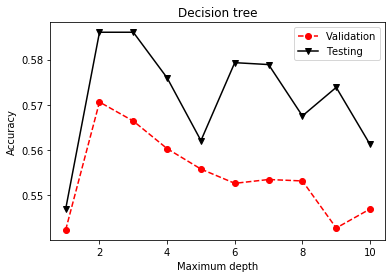

In [8]:
import numpy as np
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

maxdepths = [1,2,3,4,5,6,7,8,9,10]

validationAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

numFolds = 10
index = 0
for depth in maxdepths:
    clf = tree.DecisionTreeClassifier(max_depth=depth, random_state=1)
    scores = cross_val_score(clf, X_train, Y_train, cv=numFolds)
    validationAcc[index] = np.mean(scores)
    
    clf = clf.fit(X_train, Y_train)
    Y_predTest = clf.predict(X_test)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    index += 1
    
plt.plot(maxdepths, validationAcc, 'ro--', maxdepths, testAcc, 'kv-')
plt.xlabel('Maximum depth')
plt.ylabel('Accuracy')
plt.title('Decision tree')
plt.legend(['Validation','Testing'])


bestHyperparam = np.argmax(validationAcc)
print('Best hyperparameter: maxdepth =', maxdepths[bestHyperparam])
print('Test Accuracy =', testAcc[bestHyperparam])

***B.*** Logistic Regression Model Analysis: 

***C.*** K-nearest-neighbor Model Analysis:

***D.*** Artificial Neural Networks Analysis: Using 1 hidden layer and having calculated the best hidden neuron hyperparamater (17), there is a 58.4% accuracy.

Best hyperparameter, Hidden Neurons = 17
Test Accuracy = 0.584350021034918


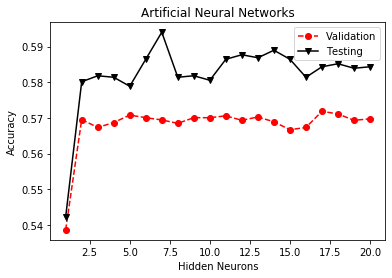

In [9]:
from sklearn import neural_network

hidden_neurons = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
validationAcc = np.zeros(len(hidden_neurons))
testAcc = np.zeros(len(hidden_neurons))


numFolds = 10
index = 0
for C in hidden_neurons:
    clf = neural_network.MLPClassifier(hidden_layer_sizes=(C,), activation='logistic', max_iter=2000, random_state=1)
    clf = clf.fit(X_train, Y_train.ravel())
    scores = cross_val_score(clf, X_train, Y_train, cv=numFolds)
    validationAcc[index] = np.mean(scores)
    
    clf = clf.fit(X_train, Y_train)
    Y_predTest = clf.predict(X_test)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    index += 1
    
plt.plot(hidden_neurons, validationAcc, 'ro--', hidden_neurons, testAcc, 'kv-')
plt.xlabel('Hidden Neurons')
plt.ylabel('Accuracy')
plt.title('Artificial Neural Networks')
plt.legend(['Validation','Testing'])
#plt.ylim([0.7,1.0])

bestHyperparam = np.argmax(validationAcc)
print('Best hyperparameter, Hidden Neurons =', hidden_neurons[bestHyperparam])
print('Test Accuracy =', testAcc[bestHyperparam])


***E.*** Cluster Analysis: Using 2 clusters (1 for a Home Win, 1 for a Home Loss) and standardized values, we did cluster analysis on our data. With the k-means clustering algorithm, there is above-50% test accuracy, but the but the test accuracy is only at 51.1% accuracy. However, when manually setting cluster centers using the intuitive positive-negative impact of each attribute, we get a 56.9% accuracy.

In [10]:
data = games.copy()
HomeWinActual = data.pop('HomeWin')
for (colname,column) in data.iteritems():
    col = pd.Series(column).astype('float')
    mean = col.mean()
    std = col.std()
    for index,val in col.items():
        col[index] = (val - mean)/std
    data[colname] = col

In [11]:
from sklearn import cluster
import pandas as pd
import numpy as np

k_means = cluster.KMeans(n_clusters=2, random_state=1)
k_means.fit(data)

centroids = pd.DataFrame(k_means.cluster_centers_)
centroids.columns= data.columns
centroids

,HomeWinPercentage,HomeRunsPerInning,HomeRunsAgainstPerInning,HomeBattingAverage,HomeOffHRsPerInning,HomeDefHRsPerInning,HomeOffWalksPerInning,HomeDefWalksPerInning,HomeOffStrikeoutsPerInning,HomeDefStrikeoutsPerInning,...,AwayBattingAverage,AwayOffHRsPerInning,AwayDefHRsPerInning,AwayOffWalksPerInning,AwayDefWalksPerInning,AwayOffStrikeoutsPerInning,AwayDefStrikeoutsPerInning,AwayStealsPerInning,AwayERA,AwayErrorsPerInning
0,0.021975,-0.317025,-0.301536,0.037192,-0.478809,-0.540056,-0.198885,-0.236941,-0.443078,-0.413039,...,0.039133,-0.472671,-0.536956,-0.203422,-0.241615,-0.447059,-0.415483,0.183621,-0.316452,0.014482
1,-0.032930,0.475071,0.451861,-0.055733,0.717508,0.809290,0.298035,0.355063,0.663965,0.618951,...,-0.058642,0.708310,0.804643,0.304834,0.362067,0.669931,0.622613,-0.275161,0.474212,-0.021701


In [12]:
from sklearn.metrics import accuracy_score
clusters = pd.Series(k_means.labels_)
print(accuracy_score((np.invert(HomeWinActual)+2).astype(int), clusters))
#print(accuracy_score(HomeWinActual.astype(int), clusters))

0.5109820752335269


This only yielded a 51.1% success rate, but it is likely because the cluster centers are in the wrong place, since there is a lot of noise and very many upsets in the MLB season. We can make our own cluster centers. Let's use the stats that should have a positive z-score to predict a Home Win (such as HomeWinPercentage), and the stats that should have a negative z-score to predict a Home Win (such as AwayBattingAverage) for the HomeWin = True cluster, and the opposite for the HomeWin = False cluster. Use 1 and -1, since the standard deviation for the standardized columns should all be 1.

In [13]:
good_stats =  [0,1,3,4,6,9,10, 15,18,20,21,24,25]
#bad_stats = [2,5,7,8,11,12,13,14,16,17,19,22,23]

zero = []
one = []
for i in range(len(data.columns)):
    if i in good_stats:
        zero.append(-1)
        one.append(1)
    else:
        zero.append(1)
        one.append(-1)

centroids = pd.DataFrame([zero,one])
centroids.columns= data.columns
centroids

,HomeWinPercentage,HomeRunsPerInning,HomeRunsAgainstPerInning,HomeBattingAverage,HomeOffHRsPerInning,HomeDefHRsPerInning,HomeOffWalksPerInning,HomeDefWalksPerInning,HomeOffStrikeoutsPerInning,HomeDefStrikeoutsPerInning,...,AwayBattingAverage,AwayOffHRsPerInning,AwayDefHRsPerInning,AwayOffWalksPerInning,AwayDefWalksPerInning,AwayOffStrikeoutsPerInning,AwayDefStrikeoutsPerInning,AwayStealsPerInning,AwayERA,AwayErrorsPerInning
0,-1,-1,1,-1,-1,1,-1,1,1,-1,...,1,1,-1,1,-1,-1,1,1,-1,-1
1,1,1,-1,1,1,-1,1,-1,-1,1,...,-1,-1,1,-1,1,1,-1,-1,1,1


We will compute this using euclidean distance between the clusters and each data point.

In [14]:
c1 = 0
c2 = 0
for i,r in data.iterrows():
    x = np.linalg.norm(r-zero)
    y = np.linalg.norm(r-one)
    if (x > y):
        c1 += 1
    else:
        c2 += 1
print('c1: ',c1,', c0: ',c2)
print(HomeWinActual.value_counts())

c1:  5932 , c0:  5951
True     6409
False    5474
Name: HomeWin, dtype: int64


Since the cluster for home win = 0 has 19 more that are closer to it than the other cluster when it should have -1, 0, or 1 more, we will need to transfer 9 data points over to have an equal distribution. We can use the 9 points where the distances between both cluster centers are the most similar.

In [18]:
dist_9th = 999
transferring = []
indices = []
c1 = set()
c0 = set()
for i,r in data.iterrows():
    x = np.linalg.norm(r-zero)
    y = np.linalg.norm(r-one)
    if (x > y):
        c1.add(i)
    else:
        c0.add(i)
        if (len(transferring) < 9):
            transferring.append(y-x)
            dist_9th = max(transferring)
            indices.append(i)
        elif y-x < dist_9th:
            transferring.pop(transferring.index(dist_9th))
            transferring.append(y-x)
            dist_9th = max(transferring)
            indices.pop(transferring.index(dist_9th))
            indices.append(i)
c1 = c1.union(indices)
c0 = c0.difference(indices)
prediction = []
#print('c0: ',len(c0),'c1',len(c1))
for i in range(len(data)):
    if i in c1:
        prediction.append(1)
    else:
        prediction.append(0)
print(accuracy_score((HomeWinActual).astype(int), prediction))

0.569300681646049


This yields a 56.9% prediction. This is much better than the k-means algorithm; however, still not as effective as other methods such as neural networks.